<a href="https://colab.research.google.com/github/mftnakrsu/case_study_baimageing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 49.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import torch
import copy
import zipfile
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
path = "/content/drive/MyDrive/yolov8_atlar/"
os.chdir(path)
print("Current Directory:", os.getcwd())


Current Directory: /content/drive/MyDrive/yolov8_atlar


In [6]:
flag = 0

if flag:
  # Zip dosyasının adını belirtin
  zip_file_name = '/content/model_dataset.zip'

  # Zip dosyasını açma
  with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
      zip_ref.extractall('model_dataset')  # Çıkarılan dosyaların kaydedileceği dizin

  # Çıkarılan dosyaların içeriğini listeleme
  extracted_files = os.listdir('model_dataset')
  print("Çıkarılan dosyalar:")
  for file in extracted_files:
      print(file)

In [11]:

# Initialize pretrained model
model = YOLO("model_dataset/single_class_model.pt")

In [12]:
import os

# Etiket dosyalarının bulunduğu dizinler
label_dirs = [
    "/content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/train",
    "/content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/val"
]

# Etiket dosyalarını güncelleyen fonksiyon
def update_labels(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Sadece .txt dosyalarını işleme al
            filepath = os.path.join(directory, filename)

            # Dosyayı oku ve düzenle
            with open(filepath, "r") as file:
                lines = file.readlines()

            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:  # Satır boş değilse işleme al
                    parts[0] = "1" if parts[0] == "0" else parts[0]
                    updated_lines.append(" ".join(parts))

            # Güncellenen içeriği tekrar dosyaya yaz
            with open(filepath, "w") as file:
                file.write("\n".join(updated_lines))

# Tüm dizinlerdeki etiket dosyalarını güncelle
for label_dir in label_dirs:
    update_labels(label_dir)

print("Etiket dosyaları başarıyla güncellendi.")


Etiket dosyaları başarıyla güncellendi.


In [14]:
# Backbone'u dondur
for name, param in model.model.named_parameters():
    if "backbone" in name:  # Eğer isimde backbone geçiyorsa
        param.requires_grad = False

# Sadece head kısmını eğit
for name, param in model.model.named_parameters():
    if "head" in name:  # Eğer isimde head geçiyorsa
        param.requires_grad = True


In [15]:

model.train(
    data="/content/drive/MyDrive/yolov8_atlar/data.yaml",  # Veri seti tanımı
    epochs=50,
    imgsz=640,
    batch=16,
    workers=4,
    project="/content/training",
    name="model_with_new_class"
)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=model_dataset/single_class_model.pt, data=/content/drive/MyDrive/yolov8_atlar/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/training, name=model_with_new_class, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=1 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.

train: Scanning /content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/train... 154 images, 20 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:16<00:00, 10.72it/s]


train: New cache created: /content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/val... 19 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:20<00:00,  1.00s/it]

val: New cache created: /content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/labels/val.cache


Plotting labels to /content/training/model_with_new_class/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/training/model_with_new_class
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.2G      1.574      7.596     0.8706         59        640: 100%|██████████| 11/11 [00:14<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all         20         59          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.2G      1.432      3.885     0.8631         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         20         59     0.0109          1     0.0565     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.5G      1.279      3.074     0.8474         45        640: 100%|██████████| 11/11 [00:13<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         20         59      0.492      0.424      0.499      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.1G      1.242      2.294      0.845         79        640: 100%|██████████| 11/11 [00:13<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         20         59      0.571      0.424      0.448      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.5G      1.263      1.975      0.833         87        640: 100%|██████████| 11/11 [00:13<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         20         59      0.452      0.492      0.509      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.6G      1.213       1.74     0.8355         76        640: 100%|██████████| 11/11 [00:14<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         20         59      0.693      0.542      0.581       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.1G      1.212      1.651     0.8226         41        640: 100%|██████████| 11/11 [00:14<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         20         59      0.595      0.712      0.658      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.4G      1.215      1.562     0.8274         40        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         20         59      0.756      0.508      0.629      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.1G      1.124      1.413     0.8197         63        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         20         59      0.642      0.661      0.654      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.4G       1.19      1.465     0.8382         56        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         59      0.632       0.61      0.671      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.4G      1.228      1.435     0.8259         44        640: 100%|██████████| 11/11 [00:13<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         20         59      0.862      0.635      0.734      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.5G      1.216       1.25     0.8236         61        640: 100%|██████████| 11/11 [00:14<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         59      0.701      0.678      0.727       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.2G      1.129      1.175     0.8115         47        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         20         59      0.789      0.678      0.759      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.4G      1.135      1.226     0.8165         35        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         20         59      0.906      0.653      0.792       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.4G      1.124      1.121     0.8131         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         20         59      0.871      0.686      0.808      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.5G        1.1      1.068     0.8013         85        640: 100%|██████████| 11/11 [00:14<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         20         59      0.794      0.695      0.781      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.1G      1.044       1.01      0.799         74        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         20         59      0.936      0.741      0.826      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.4G     0.9851      0.973     0.8009         71        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.847      0.661      0.751      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.4G     0.9839      1.016     0.8173         47        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.732      0.739      0.797      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.5G      0.958     0.8661     0.8021         63        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         20         59      0.927      0.712      0.835      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.2G     0.9485     0.9029     0.8132         46        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         20         59      0.876      0.797      0.861      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.4G     0.9427     0.8578     0.8058         34        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         20         59       0.91      0.729      0.837      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.4G     0.8818     0.7943     0.7998         55        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         20         59      0.866      0.766      0.854      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.5G     0.9135     0.8301     0.8026         77        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         20         59      0.877      0.746      0.841      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.2G     0.9281     0.7857     0.8002         68        640: 100%|██████████| 11/11 [00:14<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         20         59       0.91      0.695       0.83      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.4G     0.9043     0.7886     0.8039         68        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         59      0.936      0.745      0.834      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.4G     0.9428     0.7768      0.802         65        640: 100%|██████████| 11/11 [00:13<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         20         59       0.92      0.778      0.869      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.6G     0.8609     0.7171     0.7841         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         20         59      0.857      0.797      0.848      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.2G     0.8373     0.7246     0.7996         63        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         20         59      0.874      0.814      0.853      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.4G     0.8336     0.6822     0.8011         64        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         20         59      0.857      0.831      0.867      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.4G     0.7884     0.6572     0.7953         82        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         20         59       0.94      0.793      0.882      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.4G     0.8319     0.6961     0.7918         59        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         20         59      0.889      0.814      0.883      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.1G     0.8459     0.6789     0.7868         83        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         20         59      0.875      0.832      0.875      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.4G     0.8085     0.6568     0.7944         74        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         59      0.955       0.78      0.895       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.4G     0.8139     0.6633     0.7979         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.957      0.763      0.864       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.4G     0.7709     0.6457     0.7981         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         20         59      0.954       0.78      0.867      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.2G      0.764     0.5986     0.7961         45        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         20         59      0.957      0.763      0.889       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.4G     0.7555     0.6033     0.7877         57        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         20         59      0.958      0.779      0.895      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.4G     0.7488     0.6129     0.7928         74        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         20         59       0.89      0.824      0.908      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.5G     0.7118     0.5799     0.7858         59        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.874      0.831      0.901      0.739


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.1G     0.7105     0.6246     0.7923         45        640: 100%|██████████| 11/11 [00:15<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         20         59      0.924      0.831       0.91      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.4G     0.7122     0.5835     0.7866         39        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.936      0.831      0.904       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.4G     0.6286     0.5109     0.7858         42        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59      0.965      0.814      0.922      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.5G     0.6507     0.5631     0.8023         25        640: 100%|██████████| 11/11 [00:13<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         20         59       0.97      0.814      0.926      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.2G     0.6125     0.4926     0.7893         37        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         20         59      0.974      0.814      0.929      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.4G     0.5912     0.4722     0.7855         29        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         20         59      0.961      0.828      0.927      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.4G      0.589     0.4923     0.7826         32        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         20         59      0.974      0.814       0.92      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.5G     0.5955     0.4707     0.7925         50        640: 100%|██████████| 11/11 [00:13<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20         59       0.98      0.829       0.92      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.1G       0.58     0.4885     0.7852         37        640: 100%|██████████| 11/11 [00:13<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         20         59      0.961      0.814      0.919       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.4G     0.5802     0.4659     0.7744         44        640: 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         20         59      0.957      0.847      0.921      0.772



50 epochs completed in 0.294 hours.
Optimizer stripped from /content/training/model_with_new_class/weights/last.pt, 136.7MB
Optimizer stripped from /content/training/model_with_new_class/weights/best.pt, 136.7MB

Validating /content/training/model_with_new_class/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,125,494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


                   all         20         59      0.974      0.814      0.929      0.783
        other-vehicles         19         59      0.974      0.814      0.929      0.783
Speed: 0.2ms preprocess, 29.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/training/model_with_new_class


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ebcddbe7100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
results = model.predict("/content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/images/val/1_316535_204040.jpg", conf=0.25)


image 1/1 /content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/images/val/1_316535_204040.jpg: 640x640 2 other-vehicless, 80.0ms
Speed: 3.3ms preprocess, 80.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


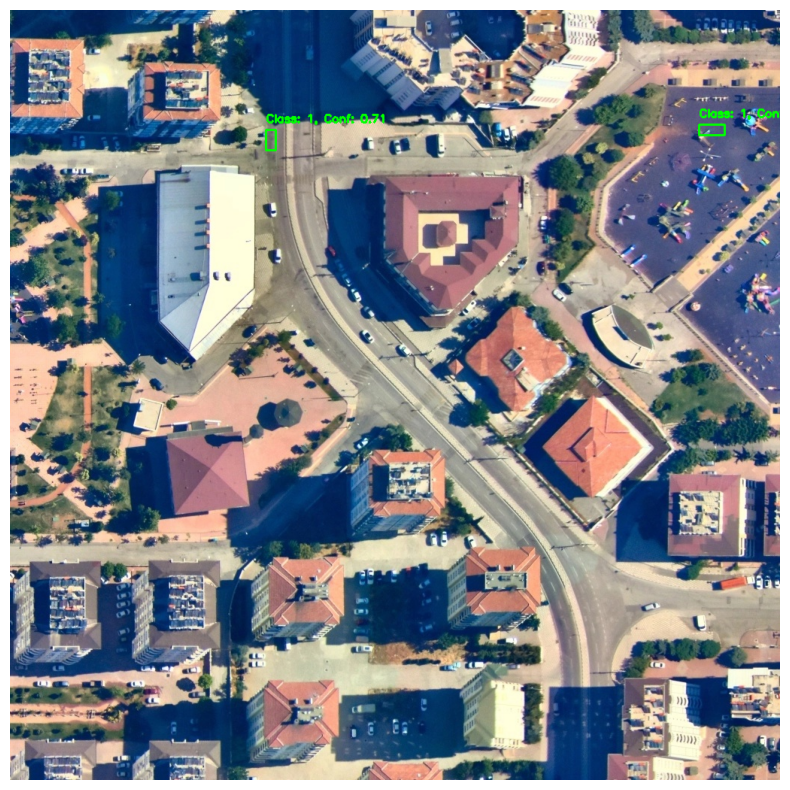

In [18]:
import cv2
import matplotlib.pyplot as plt

# Tahmin edilen sınırlayıcı kutuları al
bboxes = results[0].boxes  # İlk tahmin sonucu

# Görüntüyü yükle
image = cv2.imread("/content/drive/MyDrive/yolov8_atlar/model_dataset/additional_class/images/val/1_316541_204044.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Renkleri düzelt

# Bounding box'ları çiz
for box in bboxes:
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Sınırlayıcı kutu koordinatları
    conf = box.conf[0].cpu().numpy()  # Güven değeri
    cls = int(box.cls[0].cpu().numpy())  # Sınıf ID'si

    # Kutuyu çiz
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    # Sınıf ve güven değerini yazdır
    cv2.putText(image, f'Class: {cls}, Conf: {conf:.2f}', (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Sonucu görselleştir
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')  # Eksenleri kapat
plt.show()
